## An experimentation of Object Detection technologies

Just testing out a few trending and SOTA models on object and face detection to understand them. This will enable me to get useful insights on their use cases then implement optimal model for my problem.

In [1]:
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np
from ultralytics import YOLO
from ultralytics.yolo.utils import ops
import cv2
import time
import os
from uuid import uuid1

In [3]:
# load a pretrained YOLO v8 model from ultralytics
model = YOLO('yolov8s.pt') # 'yolov8n.yaml' for new model from scratch
# model2 = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT)

In [12]:
IMAGES_TO_TRAIN = "/home/ashmitbhattarai/Codes/face_detection_model_family/data/images"
labels = ["ramukaka"]
number_images = 20

## Collecting Training and Val Data

In [14]:


# if cam:
#     cam.release()
#     cv2.destroyAllWindows()
cam = cv2.VideoCapture(0)
if (cam.isOpened() == False): 
    print("Error reading video file")
    cam.release()
    cv2.destroyAllWindows()
else:
    try:
        for label in labels:
            print (f"capturing Images for {label}")
            time.sleep(5)
            for i in range(number_images):
                ret, frame = cam.read()
                imagename = str(uuid1())+".jpg"
                file_folder = os.path.join(IMAGES_TO_TRAIN,label)

                filepath = os.path.join(file_folder,imagename)
                print (filepath,f"writing file for {label}",i)
                cv2.imshow("Data Capture",frame)
                cv2.imwrite(filepath,frame)
                time.sleep(5)

        cam.release()
        cv2.destroyAllWindows()
    except Exception as e:
        print (e)
        cam.release()
        cv2.destroyAllWindows()



capturing Images for ramukaka
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/0d554b90-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 0
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/10521652-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 1
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/134e0528-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 2
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1649fb92-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 3
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1945f558-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 4
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1c41ebf4-06b2-11ee-971b-4851c5e7243a.jpg writing file for ramukaka 5
/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/ramukaka/1f3dfd48-06b2-11e

In [ ]:
# model.model # to display the architechture of the model itself
# results = model(url/path of the iamge)
# results.print()

# Printing the evaluated image
#plt.imsshow(np.squeeze(results.render())) # np.squeeze here actually remove outer 1 dim array and 
# plt.show()

### the read coding begins here
#### testing the camera using different models
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


## Train the model

In [14]:
# labelling images
# https://labelstud.io/guide/get_started.html#Quick-start
# pip install label-studio
# training the Yolov8 model
dataset_yaml = "../dataset.yaml"
model.train(data=dataset_yaml,epochs=300,batch=24,imgsz=640,workers=1,agnostic_nms=True,conf=0.6) # workers is causing bit of a problem in Pytorch now

New https://pypi.org/project/ultralytics/8.0.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.114 🚀 Python-3.11.3 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3070 Ti, 7966MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../dataset.yaml, epochs=300, patience=50, batch=24, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=1, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.6, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=True, classes=None,

## Load Custom model

In [2]:
new_model = YOLO('/home/ashmitbhattarai/Codes/face_detection_model_family/notebooks/runs/detect/train15/weights/best.pt')

In [17]:
cam = cv2.VideoCapture(0)

while cam.isOpened():
    ret, frame = cam.read()
    results = new_model(frame,agnostic_nms=True)
    cv2.imshow("YOLO",np.squeeze(results[0].plot()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cam.release()

cv2.destroyAllWindows()


0: 480x640 1 ashmit, 8.2ms
Speed: 11.2ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 5.2ms
Speed: 0.8ms preprocess, 5.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 4.3ms
Speed: 0.8ms preprocess, 4.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 4.2ms
Speed: 0.6ms preprocess, 4.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 4.4ms
Speed: 0.7ms preprocess, 4.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 4.6ms
Speed: 0.6ms preprocess, 4.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 2 ashmits, 4.3ms
Speed: 0.6ms preprocess, 4.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 480x640 1 ashmit, 4.6ms
Speed: 0.6ms preprocess, 4.6ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 48

wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.
wandb: Network error (TransientError), entering retry loop.



image 1/1 /home/ashmitbhattarai/Codes/face_detection_model_family/data/images/test/IMG-2076.jpg: 480x640 1 alishma, 1 ashmit, 1 glasses, 2 sabins, 1 samjhu, 75.2ms
Speed: 3.9ms preprocess, 75.2ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


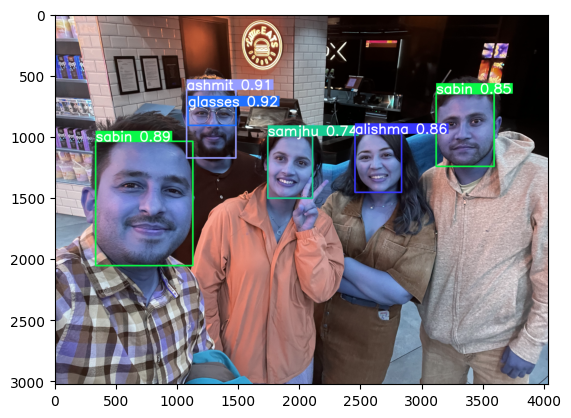

In [3]:
%matplotlib inline
result = new_model('/home/ashmitbhattarai/Codes/face_detection_model_family/data/images/test/IMG-2076.jpg')
# print (result[0])
plt.imshow(np.squeeze(result[0].plot()))
plt.show()

## Implementing Region based Native Tracking and Counting using supervision on YOLOv8

In [1]:
# !pip install supervision
import supervision as sv

result = new_model(source=0,show=True)

/bin/bash: /home/ashmitbhattarai/miniconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.8 MB/s eta 0:00:00
